In [18]:
import dicom as dcm
import SimpleITK as sitk
import numpy as np 
import array
from numpy import unravel_index
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact


from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice])#, cmap=plt.cm.gray
    interact(plot_image, myslice=(0, im.shape[0]))
    return;

# From dicom RT DOSE to rAW image 

In [147]:
heter='wstep'
energy='18e'
name='18emcs'
rd=dcm.read_file('/media/sf_CRCT/JupyterNotebook/data/image/curie/'+energy+'/'+heter+'/'+name+'.dcm')
rdpix=rd.pixel_array.astype(np.float32)

rdim=sitk.GetImageFromArray(rdpix)

#Set origin of image from rt dose value
origin=[]
for val in rd.ImagePositionPatient: origin.append(float(val))
rdim.SetOrigin(origin)

#Set spacing of image from rt dose value (x et y)
spacing=[]
for val in rd.PixelSpacing: spacing.append(float(val))

#for z direction
spacez=float(rd.GridFrameOffsetVector[1]-rd.GridFrameOffsetVector[0])
spacing.append(spacez)
rdim.SetSpacing(spacing)

sitk.WriteImage(rdim, '/media/sf_CRCT/JupyterNotebook/data/image/curie/'+energy+'/'+heter+'/'+name+'.mhd')

# Read RAW image

In [148]:
im=sitk.ReadImage('/media/sf_CRCT/JupyterNotebook/data/image/curie/'+energy+'/'+heter+'/'+name+'.mhd')
pix=sitk.GetArrayFromImage(im)
print('origin: ', im.GetOrigin())
print('spacing: ',im.GetSpacing())
print('size: ', im.GetSize())
ct_viewer(pix)

origin:  (-198.75, -198.75, -200.0)
spacing:  (2.5, 2.5, 2.5)
size:  (160, 160, 161)


interactive(children=(IntSlider(value=80, description=u'myslice', max=161), Output()), _dom_classes=('widget-interact',))

# Get LDP

interactive(children=(IntSlider(value=80, description=u'myslice', max=161), Output()), _dom_classes=('widget-interact',))

16.0


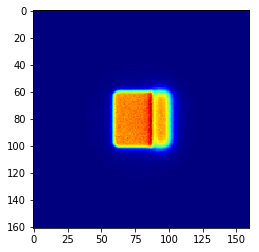

In [155]:
depth=40

ct_viewer(pix)
print (round((depth/im.GetSpacing()[1])))
depthim=int((round(depth/im.GetSpacing()[1])))
#print depthim
myslice=pix[:, depthim, :]
plt.imshow(myslice, cmap=plt.cm.jet)


y=myslice[im.GetSize()[0]/2, :]
y=np.flipud(y)
x=np.arange(0,y.shape[0])
x=x*2.5
x=x-(x.max()/2)
trace=np.column_stack((x,y))


# Plot LDP

In [156]:
data= Scatter(x = x,
               y = y,
               name='cross',
               mode = 'lines+markers')
fig = dict(data=[data])
iplot(fig, image='svg')

In [157]:
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/gammaIndex/article/curie/'+energy+'/'+heter+'/'+name+str(depth)+'.csv', trace, delimiter=',', header='pas,value', comments='')